In [29]:
from math import sin, sqrt, exp, cos
import matplotlib.pyplot as plt
from rk6 import rk_defect_control

ImportError: cannot import name 'rk_error_and_defect_control' from 'rk6' (/home/hum/Desktop/Defect control explicit multistep/final rk6 folder/rk6.py)

In [20]:
# we create a bunch of pts in the middle of a and b
# we also return their spacing 'xs' in [0, 2] so that we can plot them
def create_pts(a, b):
    num_points = 100
    curr = a
    res = [curr]
    h = (b - a) / num_points
    x = 0
    delta_x = 1/num_points
    xs = [x]
    for i in range(1, num_points + 1):
        curr += h
        res.append(curr)
        x += delta_x
        xs.append(x)
    return res, xs

def create_t_eval(start, end, num_points = 100):
    res = [start]
    h = (end - start)/(num_points - 1)

    for _ in range(num_points - 1):
        res.append(
            res[-1] + h
        )
    return res

In [21]:
def experiment(model, y0, t_span, solution):
    t_eval = create_t_eval(t_span[0], t_span[1])
    (res, sol, deriv, derivs) = rk_defect_control(model, t_span, y0[0], 1e-2)
    # print("derivs", derivs)

    # ====================================== figure of rk6 vs rk6_interps vs rk45
    # plt.figure()
    # xs = [x[0] for x in res]
    # ys = [x[1] for x in res]
    # plt.plot(xs, ys, label="rk6")

    # plots of where the end of the steps occured to look at the interp
    # for this_x in xs:
    #     plt.axvline(x=this_x) 

    computed_solutions = [sol(x) for x in t_eval]
    plt.plot(t_eval, computed_solutions, label="rk6_interpolated")

    actual_solutions = solution(t_eval)
    plt.plot(t_eval, actual_solutions, label="solution")

    # removed rk45 plt.title("solution vs rk45 vs rk6 vs rk6_interpolated")
    plt.title("solution vs rk6_interpolated")
    plt.xlabel("t")
    plt.ylabel('y')
    plt.legend()
    plt.show()
    # ====================================== end figure of rk6 vs rk6_interps vs rk45

    # ====================================== figure of defect
    # defect graphs
    # we only pick 10 of the derivs
    pick_every = (len(derivs) // 10) + 1
    # print("pick every", pick_every)
    plotted_derivs = []
    for i in range(0, len(derivs), pick_every):
        plotted_derivs.append(
            derivs[i]
        )


    plt.figure()
    for (x_i_minus_1, x_i_plus_1, hb) in plotted_derivs:
        num_points = 100
        pts_to_sample = create_t_eval(x_i_minus_1, x_i_plus_1, num_points)
        defects = []
        for pt in pts_to_sample:
            y = solution([pt])[0]
            f_eval  = model(pt, y)[0]
            hb_prime_eval = hb.prime(pt)
            defects.append(hb_prime_eval - f_eval)
        maximum_defect = max(defects)
        minimum_defect = min(defects)
        plot_vals = [(defect - minimum_defect) / (maximum_defect - minimum_defect) for defect in defects]
        #plt.plot(xs, defects, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")

        x_axis = [i/(num_points - 1) for i in range(num_points)]
        plt.plot(x_axis, plot_vals, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
    plt.title("plot of defects")
    plt.xlabel("step scaled between 0 and 2")
    plt.ylabel('defect')
    # plt.legend()
    plt.show()
    # ====================================== end figure of defect

wrong f_i_plus_1 2.7122748491592574e-12
wrong f_i_plus_1 1.1552425682737066e-12
wrong f_i_plus_1 1.1736722704824842e-12
wrong f_i_plus_1 4.758915483904502e-12
wrong f_i_plus_1 2.1213031331512866e-12


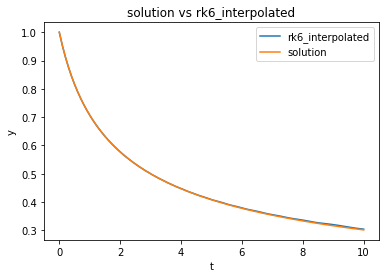

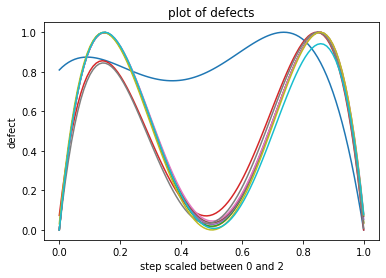

In [22]:
t_span_1 = [0, 10]
y0_1 = [1]

def model1(t, y):
    return [(-1/2) * y**3]

def solution1(t):
    return [1/sqrt(1+x) for x in t]

experiment(model1, y0_1, t_span_1, solution1)

In [23]:
t_span_2 = [0, 10]
y0_2 = [1]

def model2(t, y):
    return [-2*t*y**2]

def solution2(t):
    return [1/(1+x**2) for x in t]

experiment(model2, y0_2, t_span_2, solution2)

wrong f_i_minus_1 3.4363649727125546e-12
wrong f_i_plus_1 1.0533809068069555e-12
wrong f_i_minus_1 1.3638003588112095e-11
wrong f_i_minus_1 7.408833219969421e-10
wrong f_i_plus_1 7.1000631589324126e-12
wrong f_i_minus_1 4.996103688338031e-09
wrong f_i_plus_1 1.4195789942855752e-11
wrong y_i_minus_1 1.8174350913113813e-12
wrong f_i_minus_1 4.724681658938509e-08
wrong y_i_minus_1 1.7626444748231052e-10
wrong f_i_minus_1 8.17717639244956e-07
wrong f_i_plus_1 5.6785752315657856e-11
wrong y_i_minus_1 4.5065551290690564e-10
wrong f_i_minus_1 3.692479110727099e-06
wrong f_i_plus_1 1.1357326494196296e-10
wrong y_i_minus_1 1.1339094108109293e-09
wrong f_i_minus_1 9.71092899613221e-06
wrong y_i_minus_1 2.942359778046466e-08
wrong f_i_minus_1 0.00017793715944420553
wrong y_i_minus_1 7.038412093152147e-07
wrong f_i_minus_1 0.002836764602178688
wrong y_i_minus_1 2.621845330397221e-06
wrong f_i_minus_1 0.005243686421143125
wrong y_i_minus_1 6.127934243149724e-05
wrong f_i_minus_1 0.2445070125140427


KeyboardInterrupt: 

wrong f_i_plus_1 2.723737901888512e-12
wrong f_i_plus_1 1.13464793116691e-12


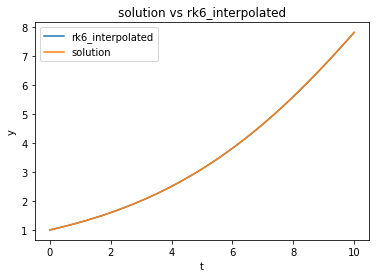

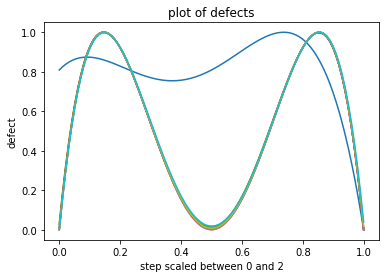

In [ ]:
t_span_3 = [0, 10]
y0_3 = [1]

def model3(t, y):
    return [(1/4)*y*(1 - y/20)]

def solution3(t):
    return [20 / ( 1 + 19 * exp(-x/4) ) for x in t]

experiment(model3, y0_3, t_span_3, solution3)

In [24]:
t_span_4 = [0, 10]
y0_4 = [0]

def model4(t, y):
    # return [100 * (sin(t) - y)]
    return [10 * (sin(t) - y)]

def solution4(t):
    # return [( 100 * ( exp(-100 * x) - cos(x) ) +  10000 * sin(x) ) / 10001 for x in t]
    return [( 10 * ( exp(-10 * x) - cos(x) ) +  100 * sin(x) ) / 101 for x in t]

experiment(model4, y0_4, t_span_4, solution4)

wrong f_i_minus_1 3.4825008098572373e-12
wrong f_i_minus_1 2.4792781115488e-11
wrong f_i_minus_1 2.117843274445704e-10
wrong f_i_minus_1 3.793135034146329e-09
wrong y_i_minus_1 2.0796522055884653e-12
wrong f_i_minus_1 1.6994730305371075e-08
wrong y_i_minus_1 5.226058037419502e-12
wrong f_i_minus_1 4.47105666450596e-08
wrong y_i_minus_1 1.3517686115546204e-10
wrong f_i_minus_1 8.175401975027249e-07
wrong y_i_minus_1 3.2297873746647303e-09
wrong f_i_minus_1 1.3013905009882926e-05
wrong y_i_minus_1 1.2022281448761914e-08
wrong f_i_minus_1 2.4063830585286743e-05
wrong y_i_minus_1 2.810467773102307e-07
wrong f_i_minus_1 0.001121479106898894
wrong f_i_plus_1 1.6661984292287713e-11
wrong y_i_minus_1 5.590026413032027e-07
wrong f_i_minus_1 0.006710208521906595
wrong y_i_minus_1 1.7896648359633197e-05
wrong f_i_minus_1 0.08947995305726408
wrong f_i_plus_1 6.666410479194695e-11
wrong y_i_minus_1 7.158430576285546e-05
wrong f_i_minus_1 0.28632660581241415
wrong f_i_plus_1 1.333282165227878e-10
wr

ZeroDivisionError: float division by zero

In [25]:
t_span_5 = [0, 10]
y0_5 = [2]

def model5(t, y):
    return [(15 * cos(10 * t))/y]

def solution5(t):
    return [sqrt(3*sin(10*x) + 4) for x in t]

experiment(model5, y0_5, t_span_5, solution5)

wrong f_i_minus_1 6.886935466354771e-12
wrong f_i_plus_1 2.1085355683680973e-12
wrong f_i_minus_1 2.7264412949534744e-11
wrong f_i_minus_1 1.4827143957063527e-09
wrong f_i_plus_1 1.4210854715202004e-11
wrong y_i_minus_1 1.3635759188446173e-12
wrong f_i_minus_1 9.999370220725723e-09
wrong f_i_plus_1 2.8412827646207006e-11
wrong y_i_minus_1 3.637090628672013e-12
wrong f_i_minus_1 9.454154703547601e-08
wrong y_i_minus_1 3.527484970788919e-10
wrong f_i_minus_1 1.6364803352431068e-06
wrong f_i_plus_1 1.1363887608695222e-10
wrong y_i_minus_1 9.018616964340254e-10
wrong f_i_minus_1 7.389672198598873e-06
wrong f_i_plus_1 2.2729196302861965e-10
wrong y_i_minus_1 2.26929630642303e-09
wrong f_i_minus_1 1.9434259784567587e-05
wrong y_i_minus_1 5.88846735816162e-08
wrong f_i_minus_1 0.00035610000046748524
wrong y_i_minus_1 1.4085720212442254e-06
wrong f_i_minus_1 0.005677109078745524
wrong y_i_minus_1 5.247002333952366e-06
wrong f_i_minus_1 0.010494011526149372
wrong y_i_minus_1 0.00012263609551066

ZeroDivisionError: float division by zero

In [26]:
t_span_6 = [0, 10]
y0_6 = [1]

def model6(t, y):
    return [-y/(t+1)]

def solution6(t):
    return [1/(x+1) for x in t]

experiment(model6, y0_6, t_span_6, solution6)

wrong f_i_minus_1 3.437139461937022e-12
wrong f_i_plus_1 1.0538236949741986e-12
wrong f_i_minus_1 1.3647860619414587e-11
wrong f_i_minus_1 7.411173896798573e-10
wrong f_i_plus_1 7.101985666224664e-12
wrong f_i_minus_1 4.997715685739479e-09
wrong f_i_plus_1 1.419964146265329e-11
wrong y_i_minus_1 1.8184342920335439e-12
wrong f_i_minus_1 4.726234592578038e-08
wrong y_i_minus_1 1.7631940352202946e-10
wrong f_i_minus_1 8.179710364597526e-07
wrong f_i_plus_1 5.6804116965736284e-11
wrong y_i_minus_1 4.5079762145405766e-10
wrong f_i_minus_1 3.6936102640883206e-06
wrong f_i_plus_1 1.1360778984226272e-10
wrong y_i_minus_1 1.1342536909708656e-09
wrong f_i_minus_1 9.713904882024949e-06
wrong y_i_minus_1 2.9432597248302272e-08
wrong f_i_minus_1 0.00017799171817411974
wrong y_i_minus_1 7.040570125793622e-07
wrong f_i_minus_1 0.0028376347597934837
wrong y_i_minus_1 2.622648580308251e-06
wrong f_i_minus_1 0.0052452928782735775
wrong y_i_minus_1 6.129812103528032e-05
wrong f_i_minus_1 0.24458194396807

ZeroDivisionError: float division by zero

In [27]:
t_span_7 = [0, 10]
y0_7 = [1]

def model7(t, y):
    alpha = 0.1
    return [ -alpha*y - exp(-alpha*t)*sin(t)]

def solution7(t):
    alpha = 0.1
    return [exp(-alpha*x)*cos(x) for x in t]

experiment(model7, y0_7, t_span_7, solution7)

wrong f_i_minus_1 3.4387770408983442e-12
wrong f_i_plus_1 1.0540041062157002e-12
wrong f_i_minus_1 1.364676427417777e-11
wrong f_i_minus_1 7.412395558459295e-10
wrong f_i_plus_1 7.1033595672176375e-12
wrong f_i_minus_1 4.998635061426171e-09
wrong f_i_plus_1 1.4202403142427045e-11
wrong y_i_minus_1 1.8185453143360064e-12
wrong f_i_minus_1 4.72685985491994e-08
wrong y_i_minus_1 1.763477142091574e-10
wrong f_i_minus_1 8.181054532568899e-07
wrong f_i_plus_1 5.681285997205521e-11
wrong y_i_minus_1 4.5086867572763367e-10
wrong f_i_minus_1 3.6942162068565043e-06
wrong f_i_plus_1 1.1362648322243984e-10
wrong y_i_minus_1 1.1344433170634716e-09
wrong f_i_minus_1 9.715499040163778e-06
wrong y_i_minus_1 2.943741450600612e-08
wrong f_i_minus_1 0.0001780207364716485
wrong y_i_minus_1 7.041714134015109e-07
wrong f_i_minus_1 0.0028380951628498297
wrong y_i_minus_1 2.623074445207152e-06
wrong f_i_minus_1 0.005246146502748086
wrong y_i_minus_1 6.130807576087971e-05
wrong f_i_minus_1 0.2446216688235189
w

ZeroDivisionError: float division by zero

In [28]:
t_span_11 = [0, 10]
y0_11 = [1]

def model11(t, y):
    return [-2*y + t]

def solution11(t):
    return [1/4 * (-1 + 5 * exp(-2 * x) + 2 * x) for x in t]

experiment(model11, y0_11, t_span_11, solution11)

wrong f_i_minus_1 3.431921413721284e-12
wrong f_i_plus_1 1.0527134719495734e-12
wrong f_i_minus_1 1.3637979634495423e-11
wrong f_i_minus_1 7.405067670163135e-10
wrong f_i_plus_1 7.0961014841941505e-12
wrong f_i_minus_1 4.993310431800069e-09
wrong f_i_plus_1 1.41877620762898e-11
wrong y_i_minus_1 1.8166579351941436e-12
wrong f_i_minus_1 4.722651381072751e-08
wrong y_i_minus_1 1.761768508856676e-10
wrong f_i_minus_1 8.173041174952544e-07
wrong f_i_plus_1 5.67581537325168e-11
wrong y_i_minus_1 4.5043480056961016e-10
wrong f_i_minus_1 3.690618155527403e-06
wrong f_i_plus_1 1.1351608542042868e-10
wrong y_i_minus_1 1.133329874392075e-09
wrong f_i_minus_1 9.706033069045716e-06
wrong y_i_minus_1 2.9408800505947852e-08
wrong f_i_minus_1 0.00017784792840647157
wrong y_i_minus_1 7.034892244295321e-07
wrong f_i_minus_1 0.0028353475736142553
wrong y_i_minus_1 2.6205350682761974e-06
wrong f_i_minus_1 0.005241061099669153
wrong y_i_minus_1 6.124871396750997e-05
wrong f_i_minus_1 0.24438478960475685
w

ZeroDivisionError: float division by zero

In [ ]:
# THE PROBLEMS BELOW CANNOT BE DONE YET
# CANNOT BE DONE AS MY CURRENT rk6 does not handle a vector for the ys
### ======================================================================


# Jeff cash test set first one

t_span_8 = [0, 10]
eps = 0.1
a = exp(-1/eps)
y0_8 = [1, a/(eps*(-1+a))]

def model8(t, y):
    return [y[1], y[0]/eps]

def solution8(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [(1-exp(x/eps)*a)/(1-a) for x in t]

experiment(model8, y0_8, t_span_8, solution8)

## the results were extremely bad. So i wanted to see the solution
plt.figure()
plt.plot(t_span_8, solution8(t_span_8))



In [ ]:
# Jeff cash test set second one
t_span_9 = [0, 10]
eps = 0.1
y0_9 = [1, -1/sqrt(eps)]

def model9(t, y):
    return [y[1], (y[0] + y[0]**2 - exp(-2*t/sqrt(eps)))/eps]

def solution9(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [exp(-x/sqrt(eps)) for x in t]

experiment(model9, y0_9, t_span_9, solution9)

In [ ]:
# Wolfram Alpha first problem

t_span_10 = [0, 10]
y0_10 = [1, 2]

def model10(t, y):
    return [y[1], -3*y[0] + 2*cos(4*t)]

def solution10(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    s = sqrt(3)
    return [(26*s*sin(s*x) - 6*cos(4*x) + 45*cos(s*x))/39 for x in t]

experiment(model10, y0_10, t_span_10, solution10)